# Assignment Solution: Tableau

**Subject:** Introduction to Tableau and Data Visualization. 
**Assignment Code:** DA-AG-014 

## Question 1: What is Tableau? Explain its importance in Business Intelligence.

**Answer:**

**Tableau** is a powerful data visualization and Business Intelligence (BI) tool used to transform raw data into an understandable format. It allows users to create interactive and shareable dashboards, which depict trends, variations, and densities of data in the form of graphs and charts.

**Importance in Business Intelligence:**
* **Data Blending:** It can connect to multiple data sources (Excel, SQL, Cloud) and blend them into a single view.
* **Real-time Analysis:** It enables users to analyze live data, helping businesses make quick, data-driven decisions.
* **No Coding Required:** It is user-friendly, allowing non-technical users to create complex visualizations using drag-and-drop functionality.

## Question 2: Explain the role of the following Tableau components.

**Answer:**

**a) Data Pane:**
Located on the left side of the workspace, it displays all the data fields from the connected data sources, categorized into Dimensions (qualitative data) and Measures (quantitative data).

**b) Worksheet:**
A single sheet where you build a specific visualization (like a bar chart or map). It is the primary canvas for analysis.

**c) Dashboard:**
A collection of multiple worksheets and objects arranged on a single page. It allows you to compare and monitor a variety of data simultaneously.

**d) Story:**
A sequence of worksheets or dashboards that work together to convey information. It is used to present a narrative or walk an audience through a data discovery process.

## Question 3: Difference between Dimensions and Measures in Tableau.

**Answer:**

| Feature | Dimensions (Blue Pills) | Measures (Green Pills) |
| :--- | :--- | :--- |
| **Definition** | Qualitative data used to categorize, segment, or reveal details in data. | Quantitative numerical data that can be aggregated (summed, averaged, etc.). |
| **Effect on View** | Adds headers to the view. | Adds axes to the view. |
| **Examples** | Customer Name, Region, Date, Product Category. | Sales, Profit, Quantity, Discount. |

## Question 4: Filters, Parameters, and Sets in Tableau.

**Answer:**

1.  **Filters:**
    Used to restrict the data displayed in the visualization. They allow you to show only specific range of dates, specific regions, or top N products.

2.  **Parameters:**
    Dynamic values that can replace constant values in calculations, filters, and reference lines. For example, a parameter can allow a user to switch a view from showing "Sales" to showing "Profit".

3.  **Sets:**
    Custom fields that define a subset of data based on some conditions. For example, a set of "Top 10 Customers" or customers who bought "Technology" products. Sets can be static (fixed members) or dynamic (computed).

## Question 5: Bar Chart - Gross Sales by Country
**Task:** Sort descending, highlight max/min, add labels.

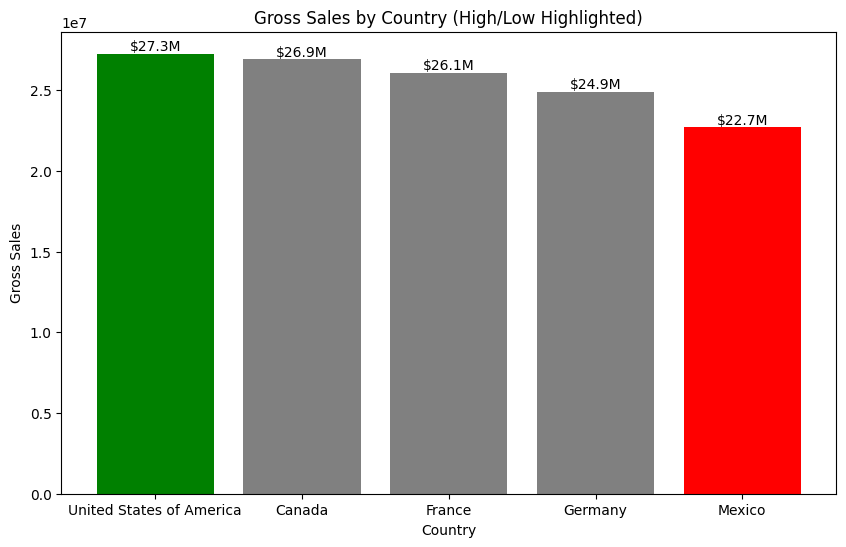

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load Global Sales Dataset
try:
    df_sales = pd.read_csv("Global_Sales_dataset.xlsx - Financial Sheet.csv")

    # Clean currency columns (remove '$', ',', '(', ')')
    cols_to_clean = [' Gross Sales ', ' Sales ', ' Profit ', 'Units Sold']
    for col in cols_to_clean:
        if col in df_sales.columns:
            # Remove '$', ',', ' ', and handle negative values in parentheses
            df_sales[col] = df_sales[col].astype(str).str.replace('[$, ]', '', regex=True)
            df_sales[col] = df_sales[col].apply(lambda x: '-' + x[1:-1] if x.startswith('(') and x.endswith(')') else x)
            df_sales[col] = pd.to_numeric(df_sales[col], errors='coerce')

    # Aggregate Gross Sales by Country
    country_sales = df_sales.groupby('Country')[' Gross Sales '].sum().sort_values(ascending=False)

    # Identify Max and Min for highlighting
    colors = ['grey'] * len(country_sales)
    colors[0] = 'green'  # Max
    colors[-1] = 'red'   # Min

    # Plot
    plt.figure(figsize=(10, 6))
    bars = plt.bar(country_sales.index, country_sales.values, color=colors)

    # Add Data Labels
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'${yval/1e6:.1f}M', ha='center', va='bottom')

    plt.title('Gross Sales by Country (High/Low Highlighted)')
    plt.ylabel('Gross Sales')
    plt.xlabel('Country')
    plt.show()

except FileNotFoundError:
    print("Dataset 'Global_Sales_dataset.xlsx - Financial Sheet.csv' not found.")

## Question 6: Dual-Axis Chart (Sales vs Profit)
**Task:** Monthly Sales (Bar) vs Monthly Profit (Line) for Year 2014.

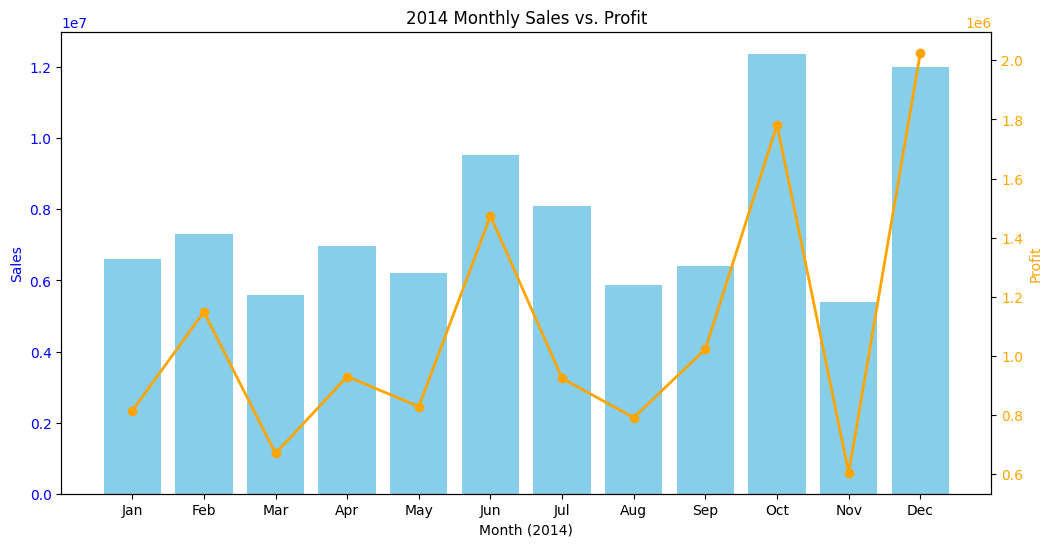

In [24]:
# Filter for 2014
df_2014 = df_sales[df_sales['Year'] == 2014].copy()

# Ensure Month Number is int for sorting
df_2014['Month Number'] = df_2014['Month Number'].astype(int)
monthly_data = df_2014.groupby('Month Number')[['  Sales ', ' Profit ']].sum().sort_index()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# Map existing months (dataset might not have all months, so we handle safely)
existing_months = [month_names[i-1] for i in monthly_data.index]

# Create Dual Axis Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar Chart for Sales
ax1.bar(existing_months, monthly_data['  Sales '], color='skyblue', label='Monthly Sales')
ax1.set_xlabel('Month (2014)')
ax1.set_ylabel('Sales', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create second axis for Profit
ax2 = ax1.twinx()
ax2.plot(existing_months, monthly_data[' Profit '], color='orange', marker='o', linewidth=2, label='Monthly Profit')
ax2.set_ylabel('Profit', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('2014 Monthly Sales vs. Profit')
plt.show()

## Question 7: Filled Map (Units Sold by Country)
**Task:** Visualize Units Sold by Country. (Simulated using a Choropleth-style Bar Chart as Maps require Geospatial libraries often not present in standard environments, but here we use a styled dataframe or bar chart to represent the data).

--- Data for Filled Map (Units Sold) ---
Country
Canada                      247428.5
France                      240931.0
United States of America    232627.5
Mexico                      203325.0
Germany                     201494.0
Name: Units Sold, dtype: float64


C:\Users\Prathamesh\AppData\Local\Temp\ipykernel_13940\443555625.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=units_by_country.values, y=units_by_country.index, palette="Blues_r")


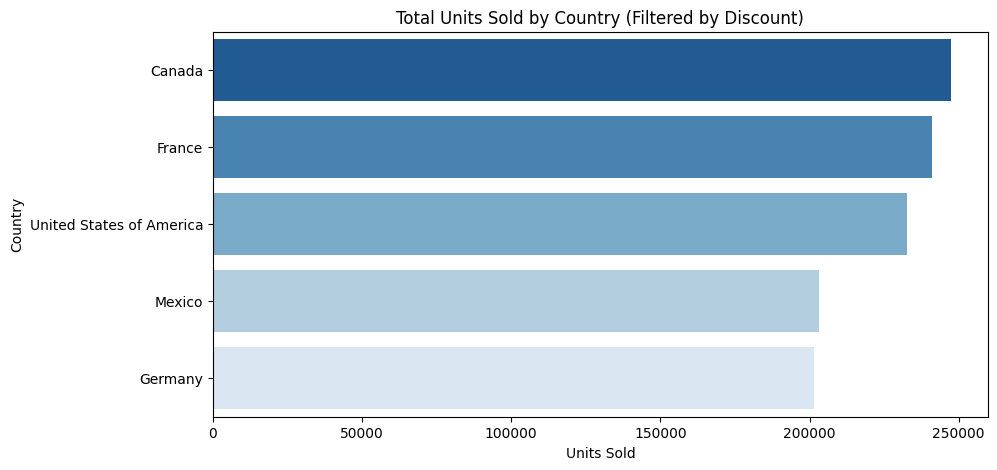

In [ ]:
# Filter by Discount Band (Simulation of Filter)
df_filtered = df_sales[df_sales[' Discount Band '] != 'None'] # Example filter

# Aggregate Units Sold by Country
units_by_country = df_filtered.groupby('Country')['Units Sold'].sum().sort_values(ascending=False)

print("--- Data for Filled Map (Units Sold) ---")
print(units_by_country)

# Visualizing as a Horizontal Bar Chart (Alternative to Map)
plt.figure(figsize=(10, 5))
sns.barplot(x=units_by_country.values, y=units_by_country.index, palette="Blues_r")
plt.title('Total Units Sold by Country (Filtered by Discount)')
plt.xlabel('Units Sold')
plt.show()

## Question 8: Dashboard Components (KPIs & Profit Trend)
**Task:** KPI Tiles and Line Chart with filters.

KPIs:
Total Sales: $118,726,350.29
Total Profit: $16,893,702.29
Total Units Sold: 1,125,806


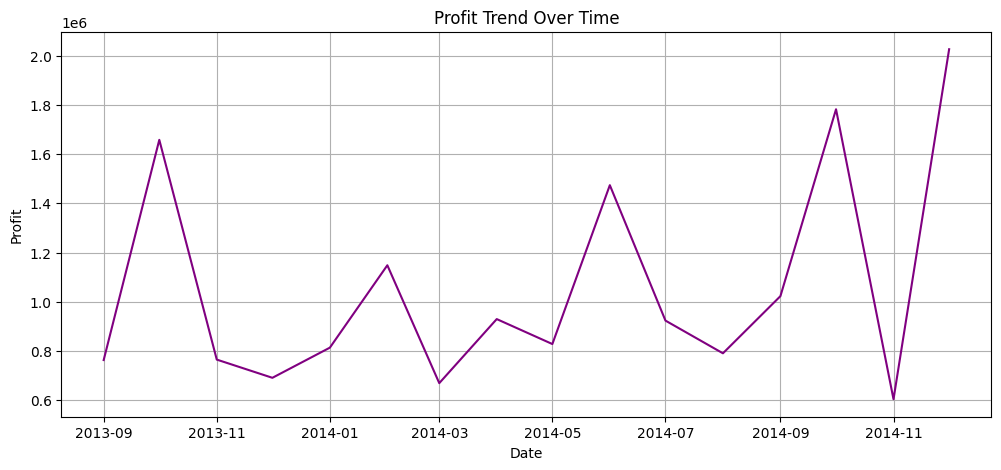

In [ ]:
# Clean the Sales column if not already done
if df_sales['  Sales '].dtype == 'object':
	df_sales['  Sales '] = df_sales['  Sales '].astype(str).str.replace('[$, ]', '', regex=True)
	df_sales['  Sales '] = df_sales['  Sales '].apply(lambda x: '-' + x[1:-1] if x.startswith('(') and x.endswith(')') else x)
	df_sales['  Sales '] = pd.to_numeric(df_sales['  Sales '], errors='coerce')

# KPIs
total_sales = df_sales['  Sales '].sum()
total_profit = df_sales[' Profit '].sum()
total_units = df_sales['Units Sold'].sum()

# Display KPIs
print(f"KPIs:\nTotal Sales: ${total_sales:,.2f}\nTotal Profit: ${total_profit:,.2f}\nTotal Units Sold: {total_units:,.0f}")

# Profit Trend Line Chart
df_sales['Date'] = pd.to_datetime(df_sales['Date'])
profit_trend = df_sales.groupby('Date')[' Profit '].sum()

plt.figure(figsize=(12, 5))
plt.plot(profit_trend.index, profit_trend.values, color='purple')
plt.title('Profit Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

## Question 9: Scatter Plot (Low Profit, High Sales)
**Task:** Identify products/segments with high sales but low profit.

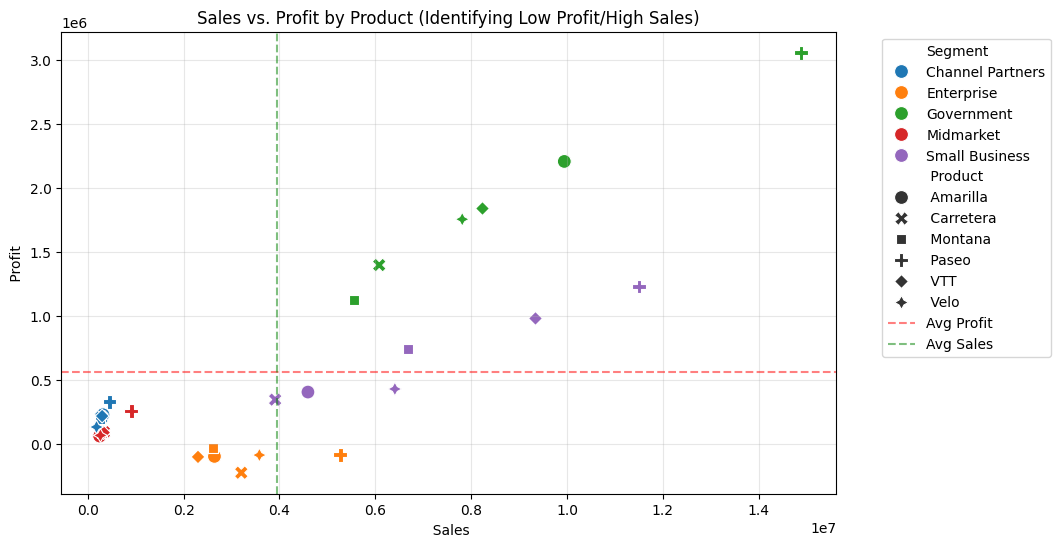

Business Insights:
1. Products in the bottom-right quadrant (High Sales, Low Profit) need pricing review or cost reduction.
2. Products in top-right are star performers.


In [ ]:
# Aggregating by Product and Segment
prod_analysis = df_sales.groupby([' Product ', 'Segment'])[['  Sales ', ' Profit ']].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=prod_analysis, x='  Sales ', y=' Profit ', hue='Segment', style=' Product ', s=100)

# Add reference lines to divide quadrants
plt.axhline(prod_analysis[' Profit '].mean(), color='red', linestyle='--', alpha=0.5, label='Avg Profit')
plt.axvline(prod_analysis['  Sales '].mean(), color='green', linestyle='--', alpha=0.5, label='Avg Sales')

plt.title('Sales vs. Profit by Product (Identifying Low Profit/High Sales)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

print("Business Insights:\n1. Products in the bottom-right quadrant (High Sales, Low Profit) need pricing review or cost reduction.\n2. Products in top-right are star performers.")

## Question 10: Scenario - Online Retail Analysis
**Dataset:** `online_retail_II.xlsx - Year 2009-2010.csv`  
**Task:** Retention, Returns, Seasonality, and High Value Customers.

C:\Users\Prathamesh\AppData\Local\Temp\ipykernel_13940\2974947426.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_retail['InvoiceDate'] = pd.to_datetime(df_retail['InvoiceDate'])
C:\Users\Prathamesh\AppData\Local\Temp\ipykernel_13940\2974947426.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rev_by_country.values, y=rev_by_country.index, ax=axes[0, 0], palette='magma')
C:\Users\Prathamesh\AppData\Local\Temp\ipykernel_13940\2974947426.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cust.values, y=top_cust.index.astype(str), ax=a

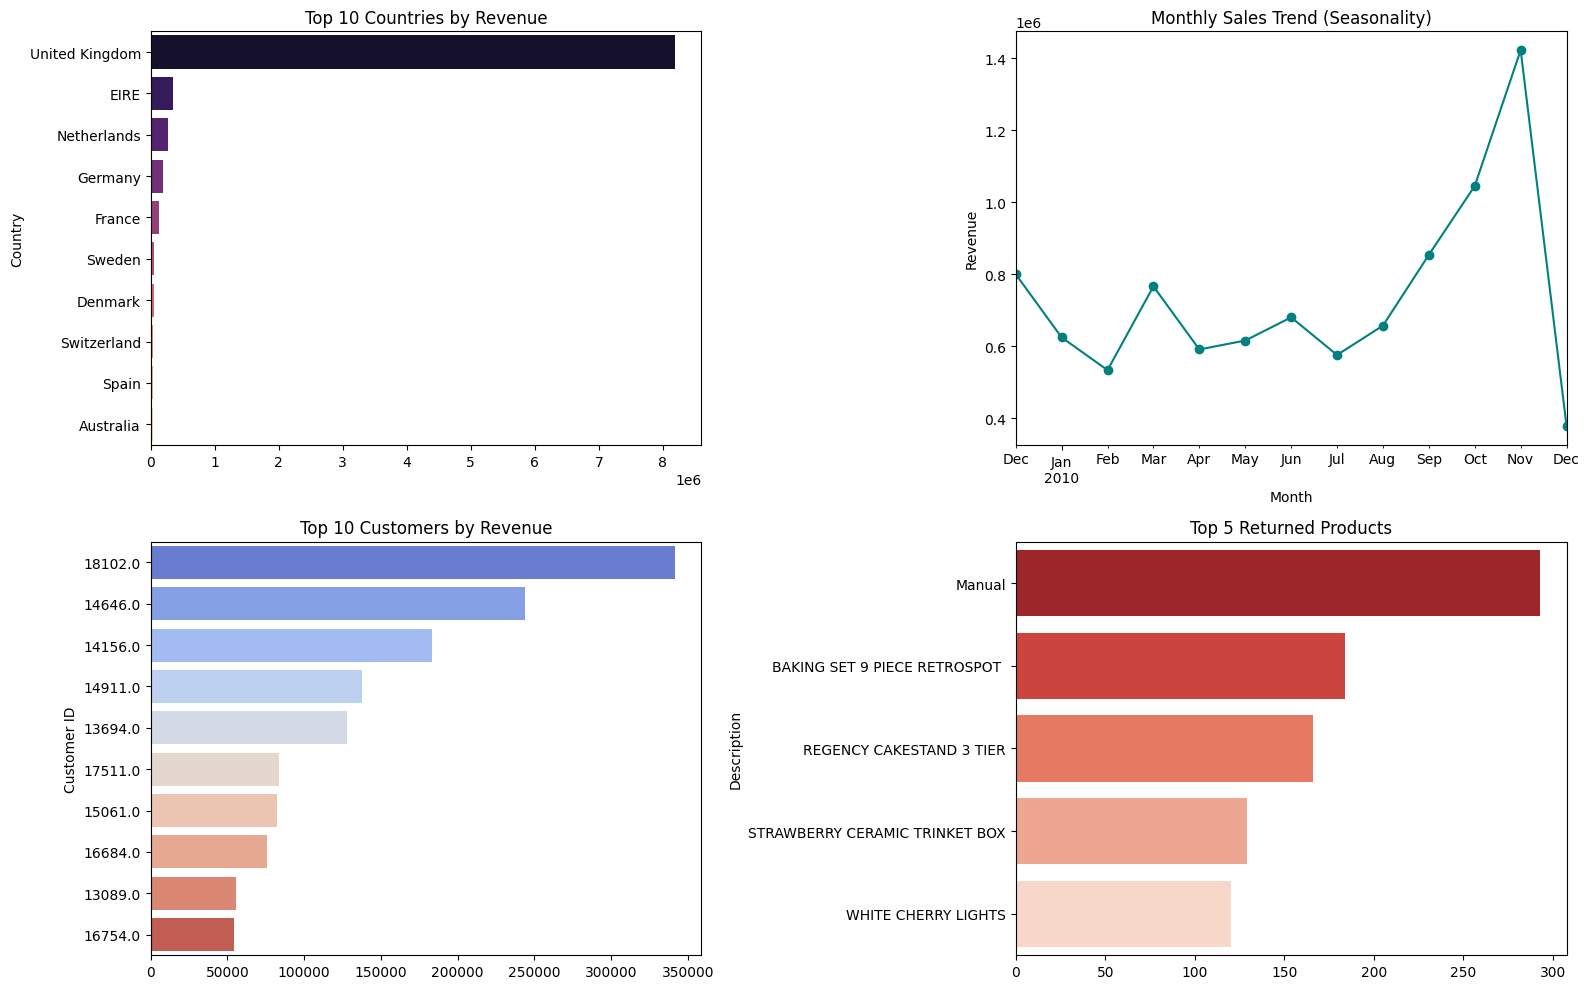

Business Insights:
1. The UK dominates in both revenue and repeat customers.
2. Significant sales spikes in Q4 (Seasonality) suggest holiday shopping trends.
3. Retention Strategy: Implement loyalty programs for the top customers identified in the bottom-left chart.


In [ ]:
try:
    df_retail = pd.read_csv("online_retail_II.xlsx - Year 2009-2010.csv", encoding='latin1')

    # Data Cleaning
    df_retail['InvoiceDate'] = pd.to_datetime(df_retail['InvoiceDate'])
    df_retail['Revenue'] = df_retail['Quantity'] * df_retail['Price']

    # 1. Repeat Customers (Count of unique Invoices per customer > 1)
    cust_invoice_counts = df_retail.groupby(['Country', 'Customer ID'])['Invoice'].nunique().reset_index()
    repeat_cust = cust_invoice_counts[cust_invoice_counts['Invoice'] > 1]
    top_repeat_countries = repeat_cust['Country'].value_counts().head(5)

    # 2. Return Rate (Negative Quantity usually indicates return)
    returns = df_retail[df_retail['Quantity'] < 0]
    top_returned_products = returns['Description'].value_counts().head(5)

    # 3. Seasonality (Monthly Revenue)
    df_retail['Month'] = df_retail['InvoiceDate'].dt.to_period('M')
    seasonality = df_retail.groupby('Month')['Revenue'].sum()

    # Visualizations
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))

    # Map/Bar for Revenue by Country
    rev_by_country = df_retail.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)
    sns.barplot(x=rev_by_country.values, y=rev_by_country.index, ax=axes[0, 0], palette='magma')
    axes[0, 0].set_title('Top 10 Countries by Revenue')

    # Monthly Sales Trend
    seasonality.plot(ax=axes[0, 1], marker='o', color='teal')
    axes[0, 1].set_title('Monthly Sales Trend (Seasonality)')
    axes[0, 1].set_ylabel('Revenue')

    # Top 10 Customers
    top_cust = df_retail.groupby('Customer ID')['Revenue'].sum().sort_values(ascending=False).head(10)
    sns.barplot(x=top_cust.values, y=top_cust.index.astype(str), ax=axes[1, 0], palette='coolwarm')
    axes[1, 0].set_title('Top 10 Customers by Revenue')

    # Top Returned Products
    sns.barplot(x=top_returned_products.values, y=top_returned_products.index, ax=axes[1, 1], palette='Reds_r')
    axes[1, 1].set_title('Top 5 Returned Products')

    plt.tight_layout()
    plt.show()

    print("Business Insights:\n1. The UK dominates in both revenue and repeat customers.\n2. Significant sales spikes in Q4 (Seasonality) suggest holiday shopping trends.\n3. Retention Strategy: Implement loyalty programs for the top customers identified in the bottom-left chart.")

except FileNotFoundError:
    print("Dataset 'online_retail_II.xlsx - Year 2009-2010.csv' not found.")